In [13]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
plt.rcParams["font.family"] = 'Malgun Gothic'

# 11장 시계열(time series)
* 금융, 경제, 생태학, 신경 과학, 서버 로그 데이터 분석 등 분야에서 사용되는 구조화된 데이터
* 시간상의 여러 지점을 관측하거나 측정할수 있는 모든 것
* 시간 내에서 특정 순간의 타임스탬프로 색인된 데이터

## 1. datetime 모듈의 자료형
* from datatime import datetime
* datetime: 날짜와 시간을 함께 나타내는 자료형
* date: 날짜(연, 월, 일)만을 나타내는 자료형
* time: 시간(hour, minute, second)만을 나타내는 자료형
* timedelta: 두 날짜 또는 시간 사이의 차이를 나타내는 자료형



## 2. datetime의 속성
* year: 년도
* month: 월
* day: 일
* hour: 시간
* minute: 분
* second: 초
* microsecond: 마이크로초

## 3. datetime 자료형의 메서드
* datatime() : 
* now(): 현재 날짜와 시간을 반환
* today(): 오늘 날짜를 반환

In [2]:
# ex 1 : 사용법
from datetime import datetime
now = datetime.now()
print(type(now))
now

<class 'datetime.datetime'>


datetime.datetime(2024, 5, 8, 16, 12, 33, 580150)

In [6]:
# ex2 : datetime 객체에서 연, 월, 일 정보 추출(!!!!)
print(now.year)
print(now.month)
print(now.day)
print(now.hour)

2024
5
8
16


## 4. timedelta 자료형의 속성
* days: 일
* seconds: 초
* microseconds: 마이크로초

In [7]:
delta =  datetime.now() - datetime(2024, 1, 1)
delta.days

128

## 5. datetime 포맷 규칙
* %Y: 년도 (4자리)
* %m: 월 (2자리)
* %d: 일 (2자리)
* %H: 시간 (24시간제, 2자리)
* %M: 분 (2자리)
* %S: 초 (2자리)


In [11]:
#ex1> datetime객체 -> 문자열 datetime 객체로 변환
stamp = datetime(2024, 5, 6)
type(stamp)
print(stamp)
print(type(stamp))

str(stamp)

data = stamp.strftime("%Y/%m/%d")
print(data)

2024-05-06 00:00:00
<class 'datetime.datetime'>
2024/05/06


## 6. 시계열의 종류
* datetime 객체로 표현되는 타임스템프로 색인된 DataFrame
* 시계열의 색인, 선택, 부분 선택

In [14]:
# ex> 날짜 문자열 리스트 -> datetime 객체으로 파싱
datestrs = ["2011-07-06 12:00:00", "2011-08-06 00:00:00"] # list of str
dt = pd.to_datetime(datestrs)
dt # DatetimeIndex 객체(중요!!)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [17]:
# ex> 시계열 데이터를 가진 시리즈
dates = [datetime(2024, 5, 2), datetime(2024, 5, 5),
         datetime(2023, 1, 7), datetime(2011, 1, 8),
         datetime(2022, 1, 10), datetime(2011, 1, 12)]
#ts = pd.Series(np.random.standard_normal(6))
#ts
ts = pd.Series(np.random.standard_normal(6), index= dates)
print(ts)
print(ts.index)

2024-05-02    0.092908
2024-05-05    0.281746
2023-01-07    0.769023
2011-01-08    1.246435
2022-01-10    1.007189
2011-01-12   -1.296221
dtype: float64
DatetimeIndex(['2024-05-02', '2024-05-05', '2023-01-07', '2011-01-08',
               '2022-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)


### [실습] 가상 시계열 데이터 생성
* pandas.date_range()  
  * range(start,end,step)와 유사
  * pandas 라이브러리의 함수로, 특정 기간 내의 날짜 범위를 생성
  * start: 시작 날짜
  * end: 종료 날짜
  * periods: 생성할 날짜 수
  * freq: 날짜 간격 (기본값: 'D' (하루))

In [22]:
# ex> 시계열 데이터프레임 생성(!!)
np.random.seed(1)
dates = pd.date_range("2000-01-01", periods=10, freq="W-WED")
print(dates)
long_df = pd.DataFrame(np.random.standard_normal((10, 4)),
                       index=dates,
                       columns=["Colorado", "Texas",
                                "New York", "Ohio"])
long_df
# 인덱싱
long_df.loc["2000-01"]
long_df.iloc[:5:2]

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08'],
              dtype='datetime64[ns]', freq='W-WED')


,Colorado,Texas,New York,Ohio
2000-01-05,1.624345,-0.611756,-0.528172,-1.072969
2000-01-19,0.319039,-0.249370,1.462108,-2.060141
2000-02-02,-0.172428,-0.877858,0.042214,0.582815


In [23]:
long_df.index

DatetimeIndex(['2000-01-05', '2000-01-12', '2000-01-19', '2000-01-26',
               '2000-02-02', '2000-02-09', '2000-02-16', '2000-02-23',
               '2000-03-01', '2000-03-08'],
              dtype='datetime64[ns]', freq='W-WED')

In [25]:
long_df.index.year
long_df.index.month

Index([1, 1, 1, 1, 2, 2, 2, 2, 3, 3], dtype='int32')

In [26]:
# 1) grouping
grouped = long_df.groupby(level=0) # 시게열 색인을 기준으로 그룹화
# 각 그룹별 이름과 데이터을 출력
for n, g in grouped:
  print(f"name : {n}")
  print(g)
  print()


name : 2000-01-05 00:00:00
            Colorado     Texas  New York      Ohio
2000-01-05  1.624345 -0.611756 -0.528172 -1.072969

name : 2000-01-12 00:00:00
            Colorado     Texas  New York      Ohio
2000-01-12  0.865408 -2.301539  1.744812 -0.761207

name : 2000-01-19 00:00:00
            Colorado    Texas  New York      Ohio
2000-01-19  0.319039 -0.24937  1.462108 -2.060141

name : 2000-01-26 00:00:00
            Colorado     Texas  New York      Ohio
2000-01-26 -0.322417 -0.384054  1.133769 -1.099891

name : 2000-02-02 00:00:00
            Colorado     Texas  New York      Ohio
2000-02-02 -0.172428 -0.877858  0.042214  0.582815

name : 2000-02-09 00:00:00
            Colorado     Texas  New York      Ohio
2000-02-09 -1.100619  1.144724  0.901591  0.502494

name : 2000-02-16 00:00:00
            Colorado     Texas  New York      Ohio
2000-02-16  0.900856 -0.683728  -0.12289 -0.935769

name : 2000-02-23 00:00:00
            Colorado     Texas  New York      Ohio
2000-02-23 -0.

In [27]:
# groupby()에 의한 메서드 
grouped.mean()
grouped.count() 
grouped.size()

2000-01-05    1
2000-01-12    1
2000-01-19    1
2000-01-26    1
2000-02-02    1
2000-02-09    1
2000-02-16    1
2000-02-23    1
2000-03-01    1
2000-03-08    1
Freq: W-WED, dtype: int64

## [실습] 시계열 데이터셋 로딩

In [32]:
# ex > 시계열 데이터셋 파일 -> 시계열 색인을 갖는 데이터프레임 객체로 변환
# 단일 데이터프레임의 첫 번째 시계열 컬럼 -> DatetimeIndex 생성
## index_col=0
close_px_all = pd.read_csv("examples/stock_px.csv", index_col=0 , parse_dates=True)

# close_px_all = pd.read_csv("examples/stock_px.csv", parse_dates= True, index_col= 0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [33]:
close_px_all.columns  # AAPL: Apple Inc, MSFT: Microsoft Corporation, XOM: Exxon Mobil Corporation, SPX: S&P 500 Index


Index(['AAPL', 'MSFT', 'XOM', 'SPX'], dtype='object')

In [34]:
# 인덱싱
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px


,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
...,...,...,...
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27
2011-10-12,402.19,26.96,77.16
2011-10-13,408.43,27.18,76.37


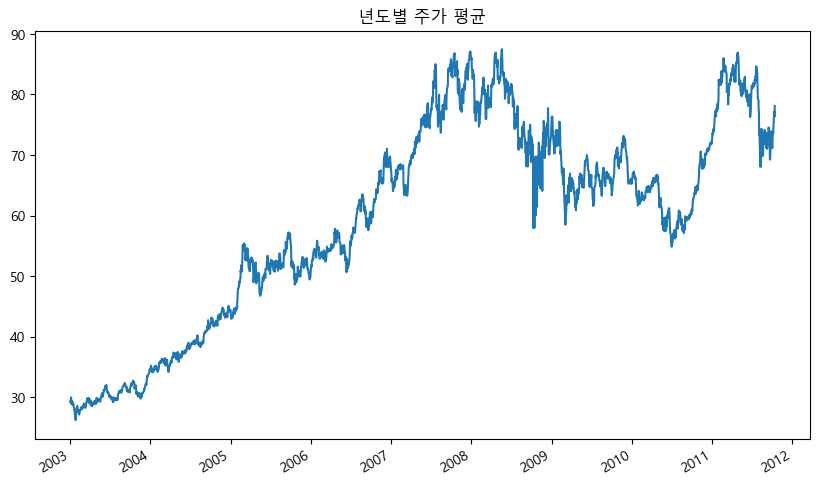

In [36]:
# 시각화 방법 
# (1) line plots
close_px["XOM"].plot(kind='line')

plt.title("년도별 주가 평균")
plt.show()

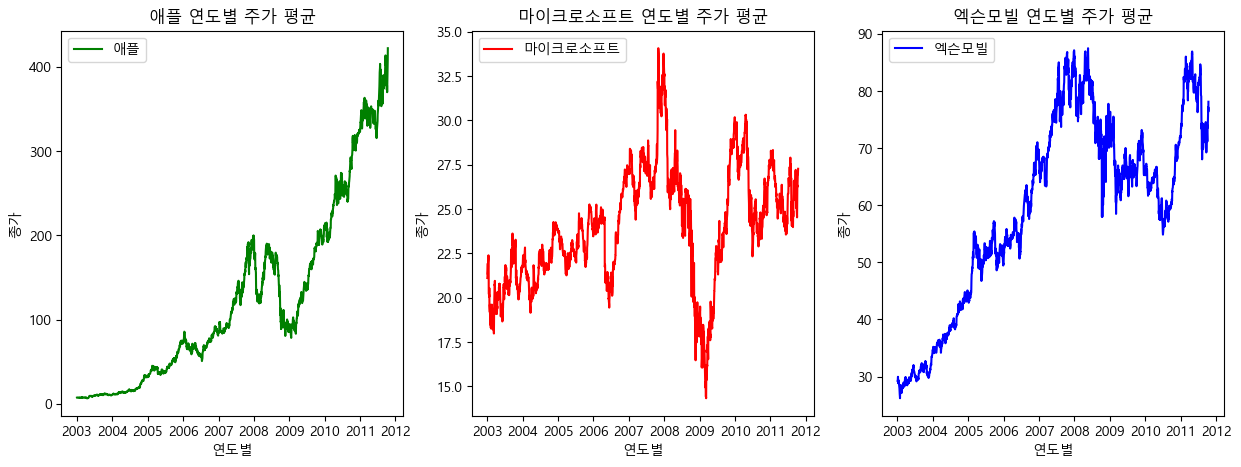

In [44]:
# 하나의 도화지에 세 종류의 그래프 그리기
fig, axes = plt.subplots(1,3,figsize=(15,5))

axes[0].plot(close_px["AAPL"],color="green",label="애플")
axes[1].plot(close_px["MSFT"],color="red",label="마이크로소프트")
axes[2].plot(close_px["XOM"],color="blue",label="엑슨모빌")


axes[0].set_title("애플 연도별 주가 평균")
axes[1].set_title("마이크로소프트 연도별 주가 평균")
axes[2].set_title("엑슨모빌 연도별 주가 평균")

axes[0].set_xlabel("연도별")
axes[1].set_xlabel("연도별")
axes[2].set_xlabel("연도별")

axes[0].set_ylabel("종가")
axes[1].set_ylabel("종가")
axes[2].set_ylabel("종가")

axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.show()

### < pandas.rolling() 메서드>!!!!!!
* pandas 라이브러리의 함수로, 특정 기간 동안의 데이터를 그룹화하여 통계를 계산
* 롤링창은 시계열 데이터 분석에 매우 중요
* 롤링창을 사용하여 데이터 변화 추세, 변동성 측정, 이상치 감지, 예측에 사용
* 롤링창을 사용하여 롤링창 내의 데이터 평균, 표준편차, 최대값/최소값, 회귀분석 등
* rolling() 함수의 인자:
  * window: 그룹화할 데이터의 수
  * min_periods: 계산에 포함할 최소 데이터 수 (기본값: window)
  * center: 그룹화할 데이터의 중심을 맞출지 여부 (기본값: False)
  * win_type: 그룹화할 데이터의 가중치 (기본값: None)


2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    346.53988
2011-10-11    346.93180
2011-10-12    347.28160
2011-10-13    347.64332
2011-10-14    348.09336
Name: AAPL, Length: 2214, dtype: float64


<Axes: >

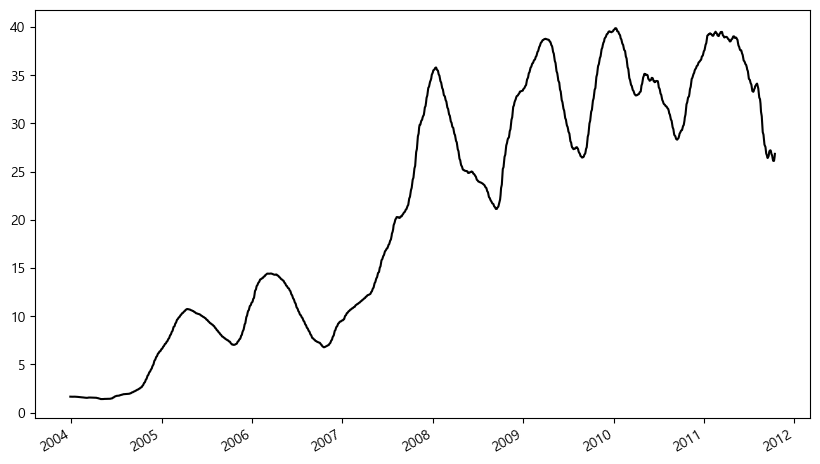

In [48]:
# (1)  롤링창 만들어 통계 계산
# DataFrame의 "AAPL" 열에 대한 rolling() 메서드를 사용하여 크기가 250인 롤링 창을 만드는 방법:
# 롤링 창 사용하기: 롤링 창을 만들면 다양한 통계 함수를 사용하여 창 내의 데이터를 분석:
print(close_px["AAPL"].rolling(250).mean())
# line plots
plt.figure() # 도화지 1개에 그림 1개 그리기
close_px["AAPL"].rolling(250).std().plot(kind="line",color="black")
# plt.show()


<Axes: >

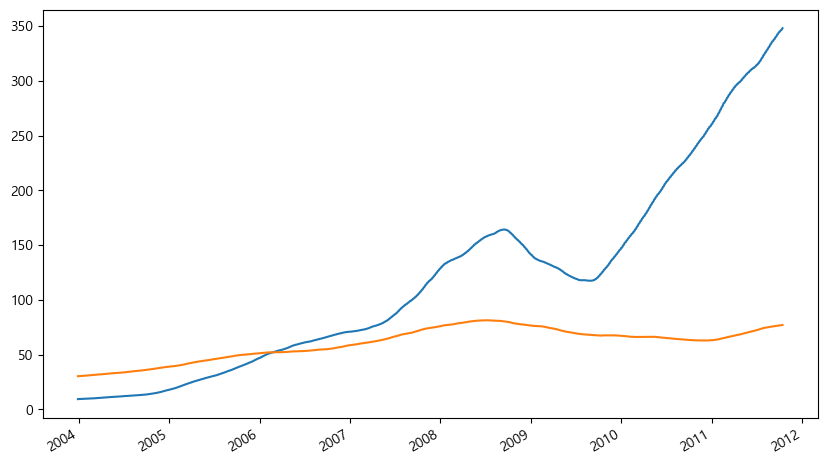

In [49]:
# (2) 롤링창 만들어 통계 계산 - 2 개의 종가에 대한 250일 롤링 평균 계산
plt.figure()
close_px["AAPL"].rolling(window = 250).mean().plot()
close_px["XOM"].rolling(window = 250).mean().plot()


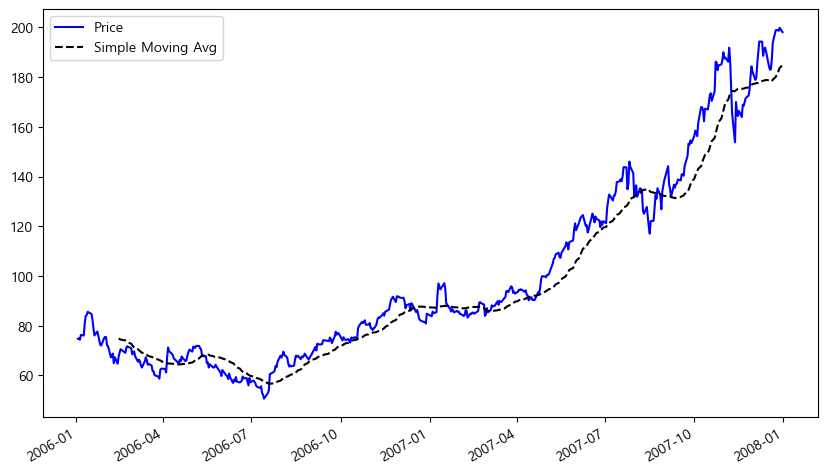

In [52]:
# # Create a figure
plt.figure()
# Select the desired date range for AAPL stock prices
aapl_px = close_px["AAPL"]["2006":"2007"]
# Calculate the 30-day simple moving average
ma30 = aapl_px.rolling(30).mean()
# Plot the AAPL stock prices : sets the line style to solid (-) and the color to blue (b).
aapl_px.plot(style="b-", label="Price")
# Plot the 30-day simple moving average
ma30.plot(style="k--", label="Simple Moving Avg")
plt.legend()
plt.show()